In [14]:
%pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
results_csv = 'math_game_results.csv'
df = pd.read_csv(results_csv)
print(df.head())


   question  time            type             datetime
0  620 ÷ 62  1.38        division  2025-01-12 15:00:00
1    7 × 44  6.27  multiplication  2025-01-12 15:01:00
2   43 + 24  3.95        addition  2025-01-12 15:02:00
3   78 + 48  4.51        addition  2025-01-12 15:03:00
4   60 + 67  1.47        addition  2025-01-12 15:04:00


In [17]:
df['num_digits_first'] = df['question'].apply(lambda x: len(x.split(' ')[0]))
df['num_digits_second'] = df['question'].apply(lambda x: len(x.split(' ')[2]))
df.head()


,question,time,type,datetime,num_digits_first,num_digits_second
0,620 ÷ 62,1.38,division,2025-01-12 15:00:00,3,2
1,7 × 44,6.27,multiplication,2025-01-12 15:01:00,1,2
2,43 + 24,3.95,addition,2025-01-12 15:02:00,2,2
3,78 + 48,4.51,addition,2025-01-12 15:03:00,2,2
4,60 + 67,1.47,addition,2025-01-12 15:04:00,2,2


/var/folders/l5/x47qtgh91p78l1tjk1bl12340000gn/T/ipykernel_54384/244172119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="type", y="time", palette="pastel")


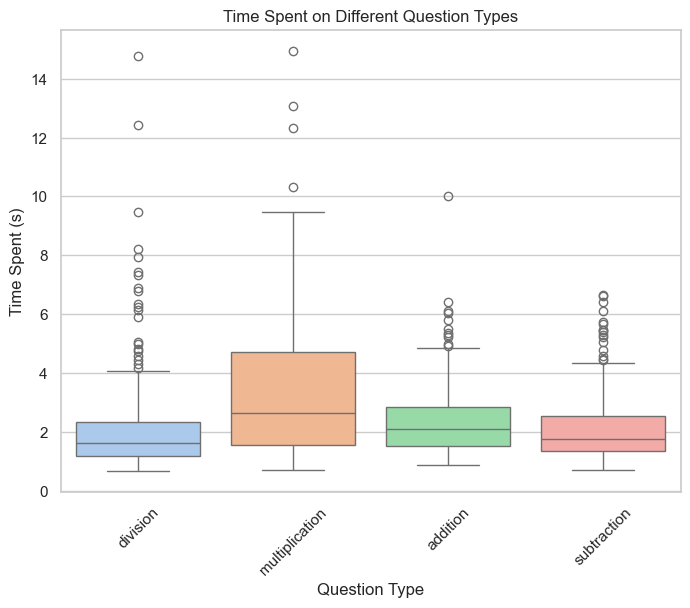

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="type", y="time", palette="pastel")
plt.title("Time Spent on Different Question Types")
plt.ylabel("Time Spent (s)")
plt.xlabel("Question Type")
plt.xticks(rotation=45)
plt.show()

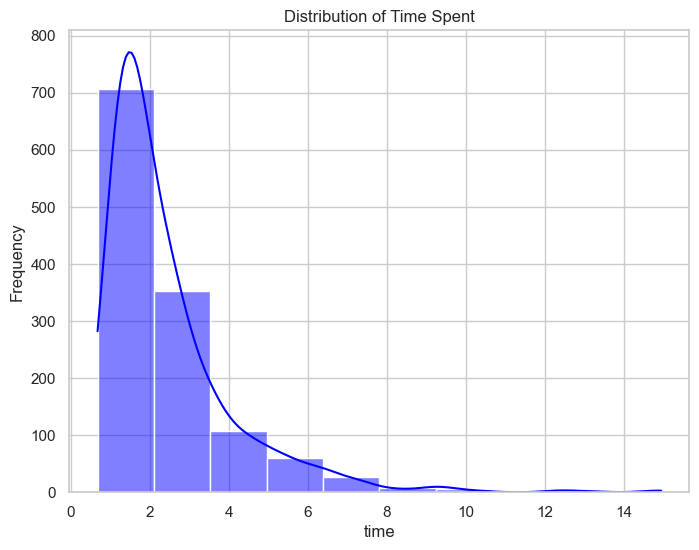

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="time", bins=10, kde=True, color="blue")
plt.title("Distribution of Time Spent")
plt.xlabel("time")
plt.ylabel("Frequency")
plt.show()


/var/folders/l5/x47qtgh91p78l1tjk1bl12340000gn/T/ipykernel_54384/3575235781.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="muted")


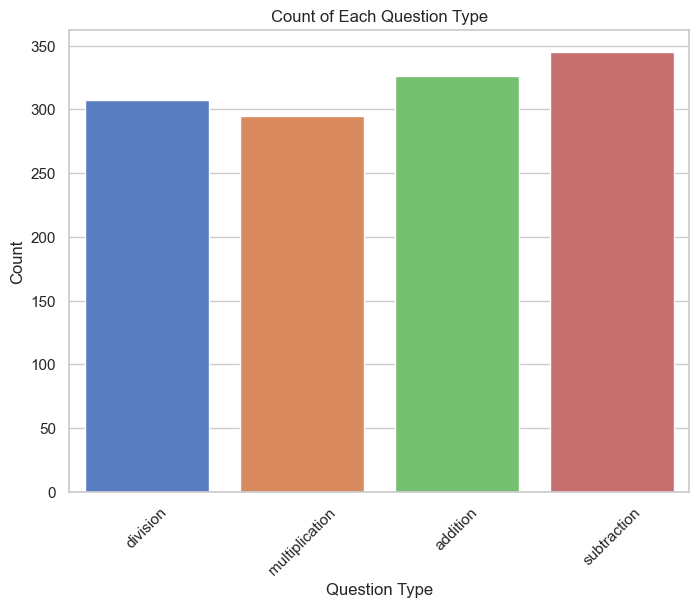

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="type", palette="muted")
plt.title("Count of Each Question Type")
plt.ylabel("Count")
plt.xlabel("Question Type")
plt.xticks(rotation=45)
plt.show()


<Figure size 1000x800 with 0 Axes>

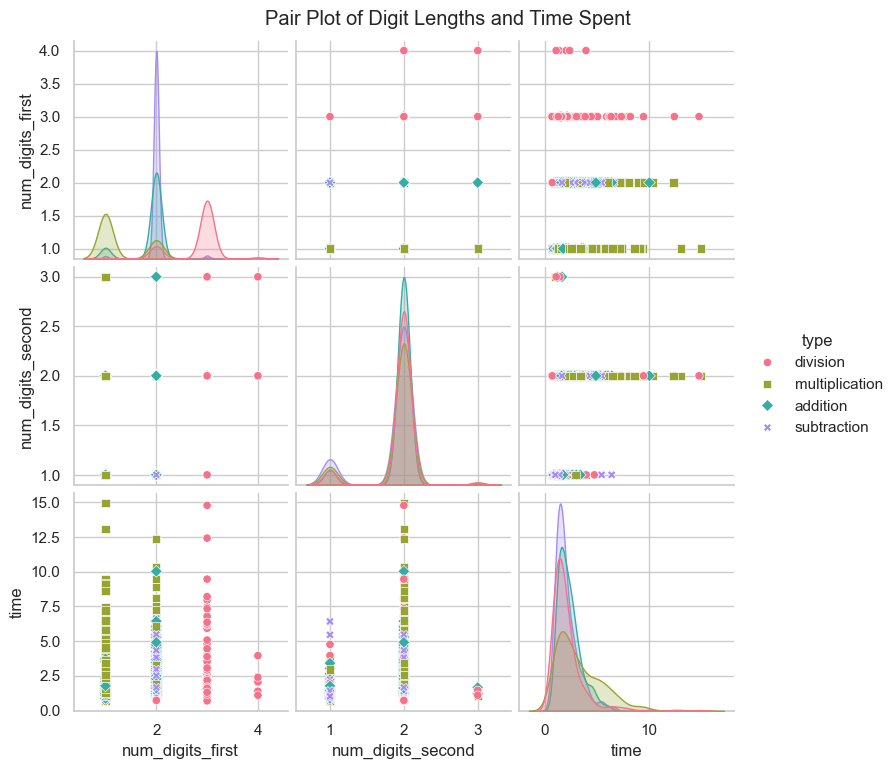

In [21]:
plt.figure(figsize=(10, 8))
sns.pairplot(
    data=df,
    vars=["num_digits_first", "num_digits_second", "time"],
    hue="type",
    palette="husl",
    markers=["o", "s", "D", "X"],
    diag_kind="kde"  # Use kernel density estimation for the diagonal
)
plt.suptitle("Pair Plot of Digit Lengths and Time Spent", y=1.02)
plt.show()


In [22]:
summary_csv = "/Users/peter/Desktop/Coding/betamac/math_game_summary.csv"
summary_df = pd.read_csv(summary_csv)
summary_df['score'] = pd.to_numeric(summary_df['score'], errors='coerce')

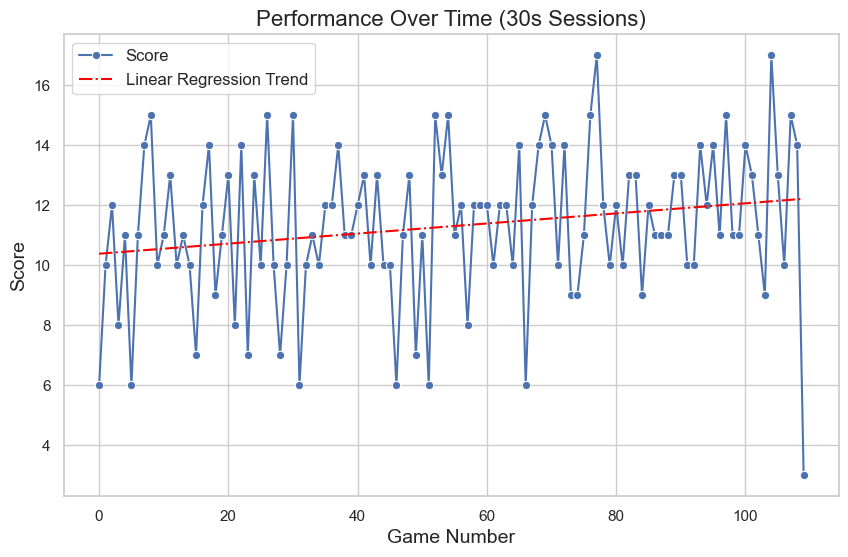

'Score = 0.0168 * Game Number + 10.3843'

In [23]:
from sklearn.linear_model import LinearRegression

# Extract the independent (X) and dependent (y) variables
X = summary_df.index.values.reshape(-1, 1)  # Game number as independent variable
y = summary_df['score'].values  # Score as dependent variable

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Generate predictions
summary_df['Linear Regression'] = model.predict(X)

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot Total Score
sns.lineplot(data=summary_df, x=summary_df.index, y="score", label="Score", marker="o")

# Plot Linear Regression Trend
sns.lineplot(data=summary_df, x=summary_df.index, y="Linear Regression", label="Linear Regression Trend", linestyle="-.", color="red")

# Add titles and labels
plt.title("Performance Over Time (30s Sessions)", fontsize=16)
plt.xlabel("Game Number", fontsize=14)
plt.ylabel("Score", fontsize=14)
plt.legend(fontsize=12)
plt.show()

# Extracting the regression coefficients
slope = model.coef_[0]
intercept = model.intercept_

# Forming the equation
regression_equation = f"Score = {slope:.4f} * Game Number + {intercept:.4f}"
regression_equation


/var/folders/l5/x47qtgh91p78l1tjk1bl12340000gn/T/ipykernel_54384/3702589949.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Operation", bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjusting legend position


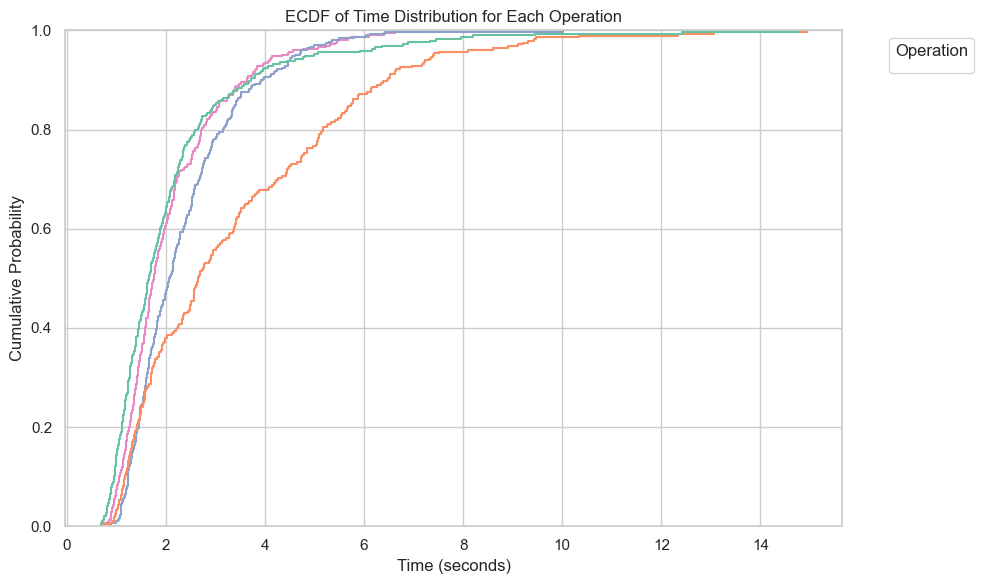

In [24]:
# Ensure proper headers for results CSV
df = pd.read_csv(results_csv, names=["question", "time", "type", "datetime"], header=0)
# Ensure proper headers for summary CSV
summary_df = pd.read_csv(
    summary_csv,
    names=["datetime", "score", "addition_first_range", "addition_second_range",
            "multiplication_first_range", "multiplication_second_range", "duration"],
    header=0
)

# Convert datetime columns to proper datetime objects
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df = df.dropna(subset=['datetime'])  # Drop rows with invalid datetime

summary_df['datetime'] = pd.to_datetime(summary_df['datetime'], errors='coerce')
summary_df = summary_df.dropna(subset=['datetime'])  # Drop rows with invalid datetime

# Plot ECDF for the time distribution for each operation
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=df, x='time', hue='type', palette='Set2') 
plt.title("ECDF of Time Distribution for Each Operation")
plt.xlabel("Time (seconds)")
plt.ylabel("Cumulative Probability")
plt.legend(title="Operation", bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjusting legend position
plt.grid(True)
plt.tight_layout()
plt.show()


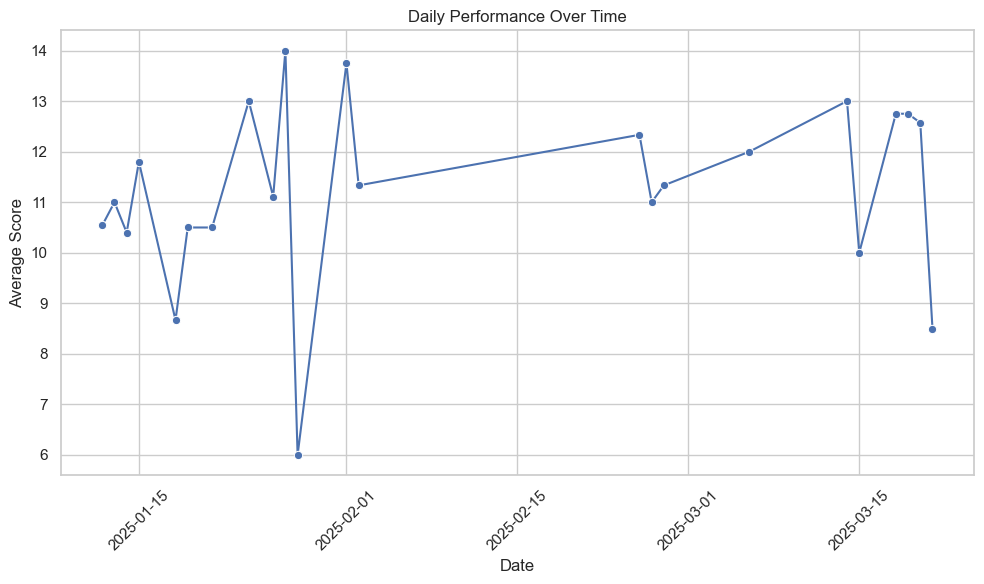

In [25]:

# Group summary data by date
summary_df['date'] = summary_df['datetime'].dt.date
daily_performance = summary_df.groupby('date')['score'].mean()

# Plot daily performance
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_performance.index, y=daily_performance.values, marker='o')
plt.title("Daily Performance Over Time")
plt.xlabel("Date")
plt.ylabel("Average Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()